<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Preprocessed_Walmart.csv')

In [4]:
features = df.columns.drop(['Weekly_Sales','Date','Year'])
target = 'Weekly_Sales'


X = df[features]
y = df[target]


Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0548 - val_loss: 0.0217
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219 - val_loss: 0.0180
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - val_loss: 0.0140
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0140 - val_loss: 0.0101
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0046
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 12/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

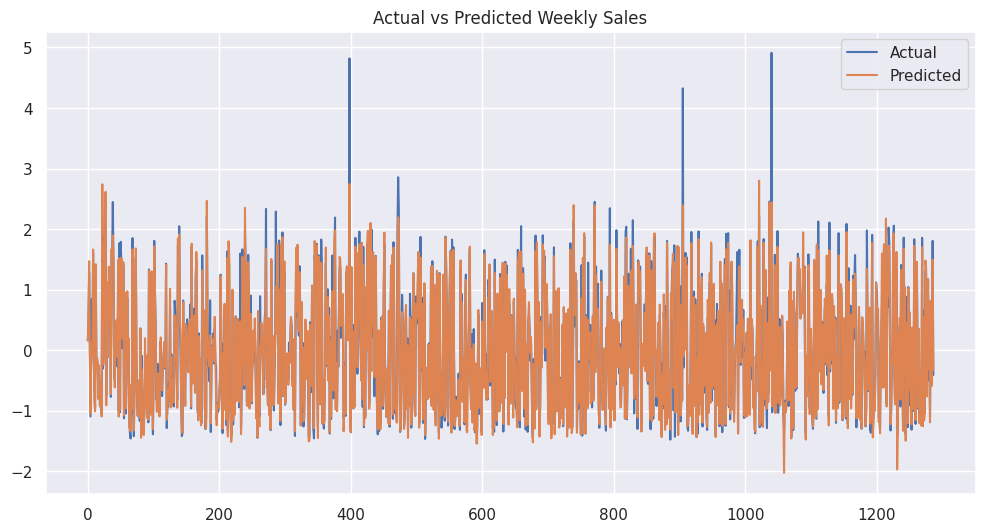

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, random_state=42, test_size=0.2)

# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# Predictions from the model
predictions = model.predict(X_test)

# Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


In [6]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.1 MB/s eta 0:00:00


In [7]:
import optuna
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Ensure input data X and y are not empty and contain no NaN values
if X.isnull().values.any() or y.isnull().values.any():
    raise ValueError("X or y contains NaN values. Please clean the data before proceeding.")

# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, random_state=42, test_size=0.2)


def create_lstm_model(hyperparams):
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
    model.add(Dense(1))  # Output layer for regression

    # Optimizer with suggested hyperparameters
    optimizer = Adam(learning_rate=hyperparams["learning_rate"],
                      beta_1=hyperparams["adam_beta"],
                      beta_2=0.999,
                      epsilon=1e-07)

    model.compile(optimizer=optimizer, loss='mse')
    return model


def objective(trial):
    hyperparams = {
        "max_iterations": trial.suggest_int("max_iterations", 500, 1500),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
        "momentum": trial.suggest_uniform("momentum", 0.1, 0.9),
        "adam_beta": trial.suggest_uniform("adam_beta", 0.9, 0.999),
        "weight_range": trial.suggest_uniform("weight_range", 0.1, 0.5),
    }

    # Create model with hyperparameters
    model = create_lstm_model(hyperparams)

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=hyperparams["max_iterations"], batch_size=32,
              validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()

    # Compute R² score for maximization
    r2 = r2_score(y_test, y_pred)
    return r2


# Create an Optuna study to maximize R² score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Display the best hyperparameters
best_params = study.best_params
print("Best parameters found by Optuna:", best_params)

# Build the final model with the best parameters
final_model = create_lstm_model(best_params)

# Train the final model
final_model.fit(X_train, y_train, epochs=best_params['max_iterations'], batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the final model
y_pred = final_model.predict(X_test).flatten()

# Inverse scale the target values
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Compute evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse) * 100

# Display evaluation results
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")


[I 2025-02-25 13:45:39,320] A new study created in memory with name: no-name-d9e01131-767e-4320-b40e-f265f0a5e5cd


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 13:51:52,583] Trial 0 finished with value: 0.9177564226646963 and parameters: {'max_iterations': 706, 'learning_rate': 5.83364978956127e-05, 'momentum': 0.5750125495044924, 'adam_beta': 0.9599630082226306, 'weight_range': 0.4703352832812232}. Best is trial 0 with value: 0.9177564226646963.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 13:52:08,230] Trial 1 finished with value: 0.9396995749799445 and parameters: {'max_iterations': 1010, 'learning_rate': 0.027329225814246568, 'momentum': 0.520705246535891, 'adam_beta': 0.9429329879942197, 'weight_range': 0.205114335310711}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 13:52:21,725] Trial 2 finished with value: 0.5572258079070238 and parameters: {'max_iterations': 772, 'learning_rate': 0.06436314915531528, 'momentum': 0.576365647288525, 'adam_beta': 0.9746444163338626, 'weight_range': 0.3034600631497234}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 13:52:54,249] Trial 3 finished with value: 0.9312496314591114 and parameters: {'max_iterations': 615, 'learning_rate': 0.0012196344481291404, 'momentum': 0.6744291758427349, 'adam_beta': 0.9431543721410645, 'weight_range': 0.2945351158852253}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 13:59:36,732] Trial 4 finished with value: 0.5332952960450592 and parameters: {'max_iterations': 763, 'learning_rate': 1.6706283262982832e-05, 'momentum': 0.6966359864604136, 'adam_beta': 0.954722834733971, 'weight_range': 0.45902788992188515}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-25 14:05:05,473] Trial 5 finished with value: 0.9314840736476588 and parameters: {'max_iterations': 1195, 'learning_rate': 7.344023305923432e-05, 'momentum': 0.35975937466147656, 'adam_beta': 0.98090806616742, 'weight_range': 0.16596016038266204}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-25 14:05:17,050] Trial 6 finished with value: 0.9166692893788637 and parameters: {'max_iterations': 634, 'learning_rate': 0.07006469654768202, 'momentum': 0.2901196857291982, 'adam_beta': 0.9089026404105127, 'weight_range': 0.12894606808603384}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[I 2025-02-25 14:16:29,250] Trial 7 finished with value: 0.6089894866090194 and parameters: {'max_iterations': 1275, 'learning_rate': 1.0775009681461107e-05, 'momentum': 0.3027131949439772, 'adam_beta': 0.9820640063687529, 'weight_range': 0.348024323682804}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:16:56,724] Trial 8 finished with value: 0.9296117512869007 and parameters: {'max_iterations': 863, 'learning_rate': 0.001827186331746274, 'momentum': 0.7797265274766114, 'adam_beta': 0.9293436597041869, 'weight_range': 0.23839631147858317}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:23:03,002] Trial 9 finished with value: 0.6097684366608034 and parameters: {'max_iterations': 707, 'learning_rate': 2.353443617342609e-05, 'momentum': 0.8918102456646596, 'adam_beta': 0.9510384523989072, 'weight_range': 0.18540925583932327}. Best is trial 1 with value: 0.9396995749799445.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:23:17,953] Trial 10 finished with value: 0.9416433133249624 and parameters: {'max_iterations': 1494, 'learning_rate': 0.0072346847310877805, 'momentum': 0.12432167619747059, 'adam_beta': 0.9191348137410635, 'weight_range': 0.37595210633832554}. Best is trial 10 with value: 0.9416433133249624.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:23:38,689] Trial 11 finished with value: 0.9426833305042349 and parameters: {'max_iterations': 1451, 'learning_rate': 0.01035098980754761, 'momentum': 0.15339738200308023, 'adam_beta': 0.9168066081064585, 'weight_range': 0.3966938348991298}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:23:55,508] Trial 12 finished with value: 0.941972176152861 and parameters: {'max_iterations': 1495, 'learning_rate': 0.007185767458742547, 'momentum': 0.10200998980523786, 'adam_beta': 0.9054293655686957, 'weight_range': 0.4010811016850002}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:24:11,973] Trial 13 finished with value: 0.9375727558833793 and parameters: {'max_iterations': 1500, 'learning_rate': 0.007350155276188994, 'momentum': 0.12560104586480786, 'adam_beta': 0.9016876567423151, 'weight_range': 0.4075965714211254}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:24:27,462] Trial 14 finished with value: 0.9408091133426024 and parameters: {'max_iterations': 1328, 'learning_rate': 0.0066442587288747775, 'momentum': 0.1873571076168599, 'adam_beta': 0.924442849481933, 'weight_range': 0.41955269281625185}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:25:46,815] Trial 15 finished with value: 0.9222106677997823 and parameters: {'max_iterations': 1113, 'learning_rate': 0.000318558594690181, 'momentum': 0.41080631936836276, 'adam_beta': 0.9114115422425909, 'weight_range': 0.4990557686691498}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:26:00,833] Trial 16 finished with value: 0.9368421337623927 and parameters: {'max_iterations': 1382, 'learning_rate': 0.018238149422354123, 'momentum': 0.2220155776908378, 'adam_beta': 0.9335672466581901, 'weight_range': 0.34109229908265654}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:26:18,153] Trial 17 finished with value: 0.9369530851401554 and parameters: {'max_iterations': 1400, 'learning_rate': 0.0032813588229626722, 'momentum': 0.4359887929929949, 'adam_beta': 0.9013399735987718, 'weight_range': 0.42202606808069704}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-25 14:27:28,466] Trial 18 finished with value: 0.9328852615154043 and parameters: {'max_iterations': 1194, 'learning_rate': 0.00041305937094123434, 'momentum': 0.2143607436631036, 'adam_beta': 0.9150569917120047, 'weight_range': 0.28020950285767626}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:27:44,266] Trial 19 finished with value: 0.9367778594408955 and parameters: {'max_iterations': 948, 'learning_rate': 0.02244139734276948, 'momentum': 0.10227438343722552, 'adam_beta': 0.9349507936354072, 'weight_range': 0.3777183960724122}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:28:41,221] Trial 20 finished with value: 0.9248350374384733 and parameters: {'max_iterations': 503, 'learning_rate': 0.0005233180784430575, 'momentum': 0.32623426249828746, 'adam_beta': 0.9194868506495345, 'weight_range': 0.32924846787625867}. Best is trial 11 with value: 0.9426833305042349.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:29:03,399] Trial 21 finished with value: 0.9456955211907973 and parameters: {'max_iterations': 1473, 'learning_rate': 0.0050965295549356285, 'momentum': 0.1492609590798279, 'adam_beta': 0.920627074758049, 'weight_range': 0.3883508984775616}. Best is trial 21 with value: 0.9456955211907973.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:29:25,022] Trial 22 finished with value: 0.9390532510463243 and parameters: {'max_iterations': 1422, 'learning_rate': 0.0032441945905408707, 'momentum': 0.1989533838779232, 'adam_beta': 0.9077423623121552, 'weight_range': 0.3803444771387801}. Best is trial 21 with value: 0.9456955211907973.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:29:46,700] Trial 23 finished with value: 0.9478406765839881 and parameters: {'max_iterations': 1296, 'learning_rate': 0.010922761770362265, 'momentum': 0.25740279841836516, 'adam_beta': 0.9243963109401321, 'weight_range': 0.43680525238435125}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:29:57,615] Trial 24 finished with value: 0.9359902284123905 and parameters: {'max_iterations': 1276, 'learning_rate': 0.01461644071368256, 'momentum': 0.2556281951982512, 'adam_beta': 0.9257886788937519, 'weight_range': 0.4558455122152932}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-02-25 14:30:07,040] Trial 25 finished with value: -3.760351936499262e-07 and parameters: {'max_iterations': 1156, 'learning_rate': 0.03553629032970514, 'momentum': 0.3934342946000461, 'adam_beta': 0.9973621759715282, 'weight_range': 0.4442558403183262}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:30:27,913] Trial 26 finished with value: 0.9357050171104857 and parameters: {'max_iterations': 1319, 'learning_rate': 0.0028801216930787756, 'momentum': 0.1701473401976275, 'adam_beta': 0.9383491417580994, 'weight_range': 0.48889058673239816}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:30:42,309] Trial 27 finished with value: 0.9423073837588266 and parameters: {'max_iterations': 1064, 'learning_rate': 0.012542210103453867, 'momentum': 0.27998095613569696, 'adam_beta': 0.9195429101330348, 'weight_range': 0.43381012308535255}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:31:13,709] Trial 28 finished with value: 0.92336426059193 and parameters: {'max_iterations': 1418, 'learning_rate': 0.0009772171320520412, 'momentum': 0.45829875023188993, 'adam_beta': 0.9641255552003791, 'weight_range': 0.2601639077004654}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2025-02-25 14:33:39,551] Trial 29 finished with value: 0.9352250648622096 and parameters: {'max_iterations': 1252, 'learning_rate': 0.00018722919931666513, 'momentum': 0.15653601139431636, 'adam_beta': 0.9285546437099456, 'weight_range': 0.3574150322666714}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:33:58,017] Trial 30 finished with value: 0.9362814652727035 and parameters: {'max_iterations': 1350, 'learning_rate': 0.004607085084997669, 'momentum': 0.23830351512650444, 'adam_beta': 0.9431841501626761, 'weight_range': 0.4736905081461694}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:34:11,642] Trial 31 finished with value: 0.9349130071599386 and parameters: {'max_iterations': 1052, 'learning_rate': 0.012095024487381752, 'momentum': 0.26892908965982154, 'adam_beta': 0.9179208096063378, 'weight_range': 0.43716265704014945}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:34:20,042] Trial 32 finished with value: 0.9253327851187546 and parameters: {'max_iterations': 1438, 'learning_rate': 0.03278998065444634, 'momentum': 0.3275564679212092, 'adam_beta': 0.9213305273156832, 'weight_range': 0.40073678792757184}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:34:31,081] Trial 33 finished with value: 0.9202977963505774 and parameters: {'max_iterations': 928, 'learning_rate': 0.04116889965116607, 'momentum': 0.5187857354627315, 'adam_beta': 0.9140677887642471, 'weight_range': 0.42972034631302625}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:34:45,879] Trial 34 finished with value: 0.9377814163619514 and parameters: {'max_iterations': 1048, 'learning_rate': 0.01119892888587275, 'momentum': 0.1676655761211993, 'adam_beta': 0.9317123840904031, 'weight_range': 0.3197740863339115}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:35:09,747] Trial 35 finished with value: 0.9371700694206467 and parameters: {'max_iterations': 1233, 'learning_rate': 0.0016756069727650114, 'momentum': 0.35875540447182824, 'adam_beta': 0.9412749384321485, 'weight_range': 0.4740245947592862}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:35:24,036] Trial 36 finished with value: 0.9371411662311241 and parameters: {'max_iterations': 1142, 'learning_rate': 0.04512921390381194, 'momentum': 0.6164694359032035, 'adam_beta': 0.9228746430243218, 'weight_range': 0.3880833963975245}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:35:41,551] Trial 37 finished with value: 0.9173101339791281 and parameters: {'max_iterations': 1332, 'learning_rate': 0.08517133307712962, 'momentum': 0.2592948848094555, 'adam_beta': 0.9139446668218069, 'weight_range': 0.3606793395064045}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:35:59,025] Trial 38 finished with value: 0.9420894646678529 and parameters: {'max_iterations': 1461, 'learning_rate': 0.01015830329707252, 'momentum': 0.48483449659165556, 'adam_beta': 0.9495815437444636, 'weight_range': 0.4589233705387247}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:36:13,543] Trial 39 finished with value: 0.9381730216294234 and parameters: {'max_iterations': 1386, 'learning_rate': 0.02070308926607668, 'momentum': 0.28660089078676787, 'adam_beta': 0.9062060104075782, 'weight_range': 0.31139323044548195}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:36:56,612] Trial 40 finished with value: 0.9333398690344411 and parameters: {'max_iterations': 1085, 'learning_rate': 0.0009488881325940418, 'momentum': 0.5613694292714075, 'adam_beta': 0.9557916138904835, 'weight_range': 0.44508035933376633}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:37:07,533] Trial 41 finished with value: 0.9377186205261253 and parameters: {'max_iterations': 1455, 'learning_rate': 0.011222795921701228, 'momentum': 0.4707032445371794, 'adam_beta': 0.9674947823645706, 'weight_range': 0.46531640512236117}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:37:25,677] Trial 42 finished with value: 0.9419438855566702 and parameters: {'max_iterations': 1464, 'learning_rate': 0.004793769443365162, 'momentum': 0.669225916324081, 'adam_beta': 0.9517956827199683, 'weight_range': 0.41332262784933194}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:37:49,514] Trial 43 finished with value: 0.9365209819570645 and parameters: {'max_iterations': 1294, 'learning_rate': 0.0019671921804407188, 'momentum': 0.1381433647083894, 'adam_beta': 0.946130257199994, 'weight_range': 0.4807374412470254}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:38:08,384] Trial 44 finished with value: 0.9362205564778587 and parameters: {'max_iterations': 1369, 'learning_rate': 0.009959414727622646, 'momentum': 0.36733903285839514, 'adam_beta': 0.9362928620728207, 'weight_range': 0.1075021895640676}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:38:27,107] Trial 45 finished with value: 0.9386845457370908 and parameters: {'max_iterations': 1461, 'learning_rate': 0.00477938213910382, 'momentum': 0.7788118632666758, 'adam_beta': 0.929290370792359, 'weight_range': 0.45335136148224525}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:38:37,987] Trial 46 finished with value: 0.9308189047374869 and parameters: {'max_iterations': 1193, 'learning_rate': 0.02555496254712405, 'momentum': 0.20883239420176966, 'adam_beta': 0.94709390119173, 'weight_range': 0.39163348501595785}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:38:50,902] Trial 47 finished with value: 0.9357669759085858 and parameters: {'max_iterations': 856, 'learning_rate': 0.01556448298969531, 'momentum': 0.30091588319026, 'adam_beta': 0.9568931534091821, 'weight_range': 0.3641620235061193}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-02-25 14:39:08,006] Trial 48 finished with value: 0.93732323387125 and parameters: {'max_iterations': 1500, 'learning_rate': 0.005248337621389869, 'momentum': 0.5557404635579026, 'adam_beta': 0.9263960350564029, 'weight_range': 0.4295271193950265}. Best is trial 23 with value: 0.9478406765839881.


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2025-02-25 14:39:18,632] Trial 49 finished with value: 0.9150903066173754 and parameters: {'max_iterations': 975, 'learning_rate': 0.04976209292650086, 'momentum': 0.24068713438359407, 'adam_beta': 0.9109791986747718, 'weight_range': 0.40744232100685807}. Best is trial 23 with value: 0.9478406765839881.


Best parameters found by Optuna: {'max_iterations': 1296, 'learning_rate': 0.010922761770362265, 'momentum': 0.25740279841836516, 'adam_beta': 0.9243963109401321, 'weight_range': 0.43680525238435125}
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² Score: 0.924
Mean Absolute Error (MAE): 0.142
Mean Squared Error (MSE): 0.077
Root Mean Squared Error (RMSE): 0.278
Mean Absolute Percentage Error (MAPE): 61.196%
